# Task 2: Prediction using Unsupervised ML

### Part A : data Preprocessisng

#### Importing the necessary lbraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

#### Reading the data from the dataset

In [21]:
# importing the data from the sklearn library

iris_ds = pd.read_csv("Iris.csv")
iris_ds.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# Checking the dimensions of the data

iris_ds.shape

(150, 6)

The dataset contains 150 rows and 4 columns

In [23]:
# Checking the detailed info of the given datasaet

iris_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In the dataset there are no null values present. 

In [24]:
iris_ds.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [25]:
# Dropping the id column 
iris_ds.drop('Id', axis = 1, inplace=True)

In [26]:
iris_ds.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [28]:
iris_ds.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### The need of the feature scaling and the replacing null values is not a requirement

#### Dividing the dataset into FM and DVV

In [38]:
x = iris_ds.iloc[:,:-1].values
y = iris_ds.iloc[:,-1].values

In [39]:
x[:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

The Feature Matrix(FM) contains all rows and First four columns which will act as input and the remaining last column will be the output.

#### Visualization of the data we are talking about

In [32]:
from IPython.display import Image
Image(url='http://carlosbaia.com/img/decision-tree-e-random-forest/iris-flowers.png', width=2000)

The Images of the targeted flowers whose data are given to us. The size of the petal, sepal their width etc.



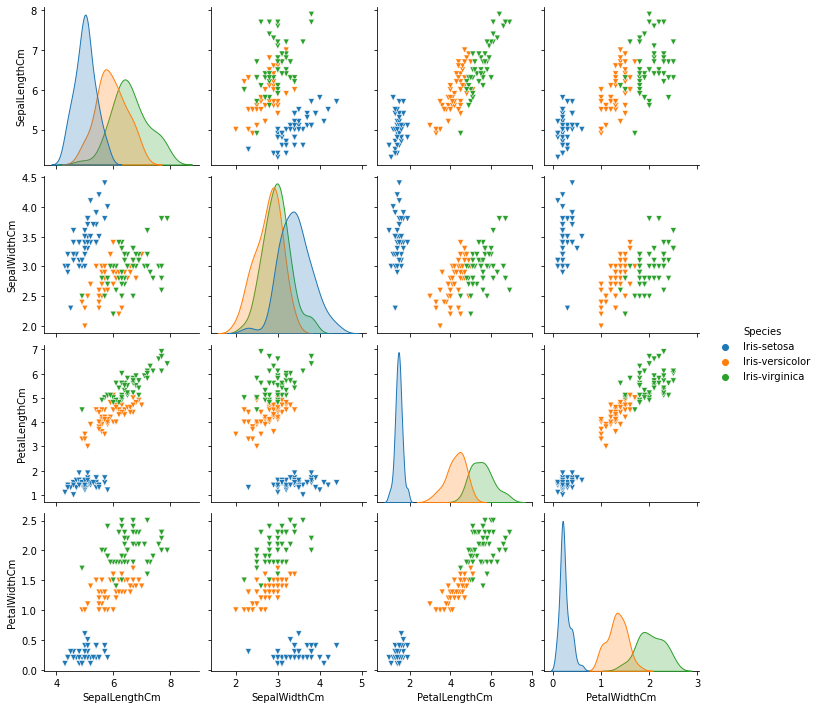

In [36]:
sns.pairplot(iris_ds, hue='Species', markers='v');

The above graph shows the multiple relationships between the different specis of flowers. 

## Building The model

We will use the K Means Clustering technique to cluster the data into specific catagories according to their properties.

In order to find the Optimum no. of clusters we will use Elbow method and throgh that the no. of clusters will be determined.

In [44]:
# Elbow Method

from sklearn.cluster import KMeans

error_rate = []
k_range = range(1,11)
for i in k_range:
    kc = KMeans(n_clusters=i)
    predi = kc.fit(x)
    error_rate.append(kc.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


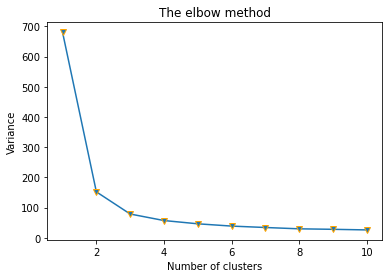

In [45]:
# Plotting the error rate vs k graph
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Variance')
plt.plot(k_range,error_rate,marker = 'v',markeredgecolor='orange');

**From The above observation we can deduce that the optimum k is 3 as t6he significant decrease in the error is less after 3.**

In [47]:
# Predicting the values

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(x)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

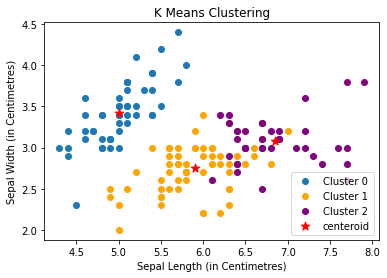

In [52]:
# Visualization of the predicted clusters

plt.scatter(x[y_predicted == 0,0],x[y_predicted == 0,1],label = 'Cluster 0')
plt.scatter(x[y_predicted == 1,0],x[y_predicted == 1,1],label = 'Cluster 1',c = 'orange')
plt.scatter(x[y_predicted == 2,0],x[y_predicted == 2,1],label = 'Cluster 2',c = 'purple')

# plotting the cluster centers
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker='*', color='red',s=80, label = 'centeroid')
plt.title('K Means Clustering')
plt.xlabel('Sepal Length (in Centimetres)')
plt.ylabel('Sepal Width (in Centimetres)')
plt.legend()

## Thank YOU !!